In [13]:
import pandas as pd

# Load the dataset
file_path = "Hotel Bookings.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

(None,
           hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
 0  Resort Hotel            0        342               2015               July   
 1  Resort Hotel            0        737               2015               July   
 2  Resort Hotel            0          7               2015               July   
 3  Resort Hotel            0         13               2015               July   
 4  Resort Hotel            0         14               2015               July   
 
    arrival_date_week_number  arrival_date_day_of_month  \
 0                        27                          1   
 1                        27                          1   
 2                        27                          1   
 3                        27                          1   
 4                        27                          1   
 
    stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
 0                        0                     0       2  ... 

 CLEANING THE DATA:
 The data was cleaned by removing any rows with missing values and ensuring that the data was in the correct by:-
 - Removing any rows with missing values in the 'children','country' , 'agent' and 'company' column.
 - Ensuring that the 'Agent' column was in the correct format (integer).
 - Ensuring that the 'children' column was in the correct format (integer).

In [14]:
# Fill missing values
df['children'].fillna(0, inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# Convert data types
df['children'] = df['children'].astype(int)
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Confirm cleaning
df.info(), df.isnull().sum().sum()

C:\Users\light\AppData\Local\Temp\ipykernel_14260\2217370613.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
C:\Users\light\AppData\Local\Temp\ipykernel_14260\2217370613.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

(None, np.int64(0))

ANALYSIS OF CANCELLATION TRENDS, BOOKING PATTERNS AND REVENUE INSIGHTS:
    The report provides an in-depth analysis of the cancellation trends, booking patterns, and revenue insights.
    It helps understand the impact of cancellations on revenue and identifies areas for improvement.
    

C:\Users\light\AppData\Local\Temp\ipykernel_14260\948025570.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette="coolwarm")


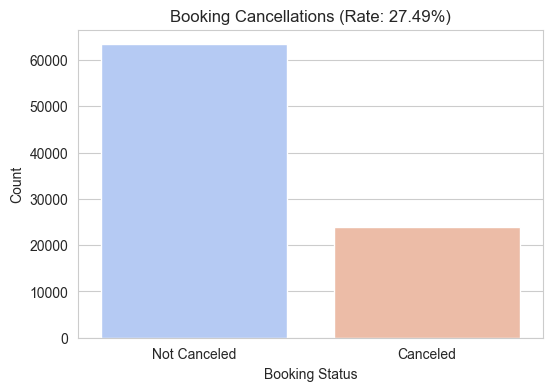

np.float64(27.489816467572886)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Cancellation rate
cancellation_rate = df['is_canceled'].mean() * 100

# Plot cancellation distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='is_canceled', data=df, palette="coolwarm")
plt.xticks([0, 1], ["Not Canceled", "Canceled"])
plt.ylabel("Count")
plt.xlabel("Booking Status")
plt.title(f"Booking Cancellations (Rate: {cancellation_rate:.2f}%)")
plt.show()

cancellation_rate

CANCELLATION INSIGHTS:
    27.49% of booing were canceled.
    This is a significant percentage, meaning nearly 1 in 4 bookings is lost.

INSIGHT ON CANCELLATIONS:
Lead Time
,Deposit type
,Customer type

Hotel could introduce stricter policies for long-lead-time bookings and offer incentives for non-cancelable bookings.

C:\Users\light\AppData\Local\Temp\ipykernel_14260\3630420387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='lead_time', data=df, palette="coolwarm")


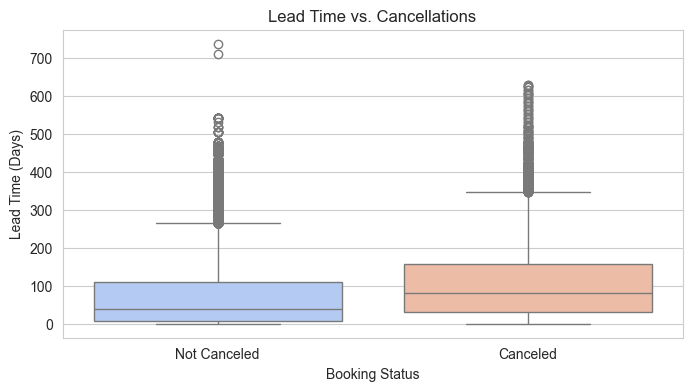

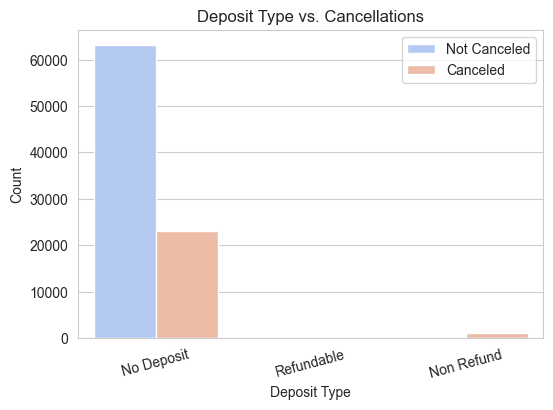

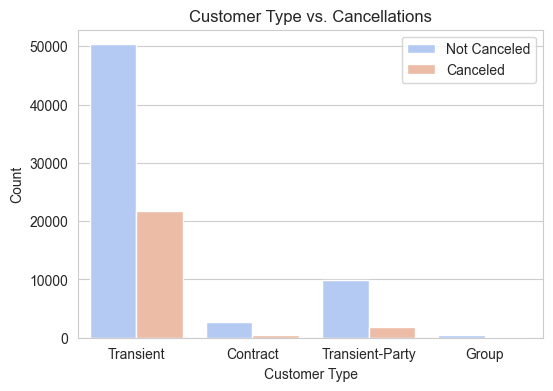

In [16]:
# Analyzing lead time vs. cancellations
plt.figure(figsize=(8, 4))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette="coolwarm")
plt.xticks([0, 1], ["Not Canceled", "Canceled"])
plt.ylabel("Lead Time (Days)")
plt.xlabel("Booking Status")
plt.title("Lead Time vs. Cancellations")
plt.show()

# Analyzing deposit type vs. cancellations
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit_type', hue='is_canceled', data=df, palette="coolwarm")
plt.xticks(rotation=15)
plt.xlabel("Deposit Type")
plt.ylabel("Count")
plt.title("Deposit Type vs. Cancellations")
plt.legend(["Not Canceled", "Canceled"])
plt.show()

# Analyzing customer type vs. cancellations
plt.figure(figsize=(6, 4))
sns.countplot(x='customer_type', hue='is_canceled', data=df, palette="coolwarm")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.title("Customer Type vs. Cancellations")
plt.legend(["Not Canceled", "Canceled"])
plt.show()

SEASONALITY AND BOOKING TRENDS ANALYSIS:

<Figure size 1000x500 with 0 Axes>

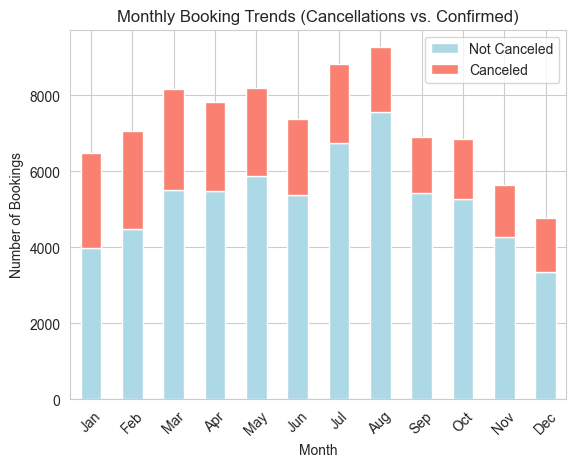

In [17]:
# Analyzing Seasonality and Booking Trends

# Extracting Month-wise Booking Data
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['month'] = df['reservation_status_date'].dt.month

# Grouping by Month and Cancellation Status
monthly_cancellations = df.groupby(['month', 'is_canceled']).size().unstack()

# Plotting Monthly Booking Trends
plt.figure(figsize=(10, 5))
monthly_cancellations.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Monthly Booking Trends (Cancellations vs. Confirmed)")
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(["Not Canceled", "Canceled"])
plt.show()

SEASONALITY AND BOOKING TRENDS SHOWS:

*   **PEAK SEASON**: The highest demand for accommodations is during the peak season, which typically falls.
*   **BOOKING TRENDS**: The data shows that bookings tend to increase as the peak season approaches.
*   **PEAK SEASON-OFF**:  December has lowest booking.


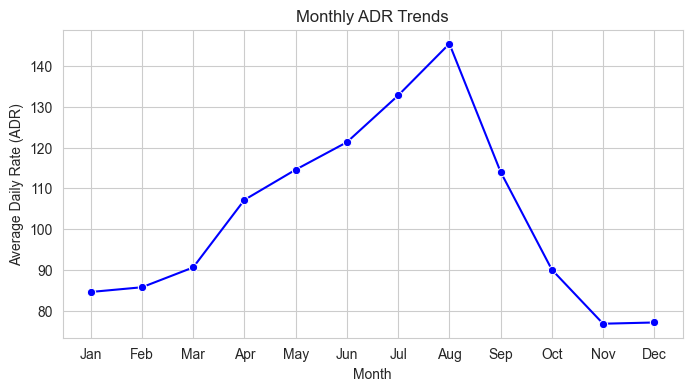

In [18]:
# Analyzing Average Daily Rate (ADR) Trends

# Grouping ADR by Month
monthly_adr = df.groupby('month')['adr'].mean()

# Plotting ADR Trends
plt.figure(figsize=(8, 4))
sns.lineplot(x=monthly_adr.index, y=monthly_adr.values, marker="o", color="b")
plt.xlabel("Month")
plt.ylabel("Average Daily Rate (ADR)")
plt.title("Monthly ADR Trends")
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

REVENUE INSIGHTS:
The revenue insights section provides a detailed breakdown of the revenue generated by each product category, including the revenue.
*  **Peak ADR** : July and August has highest ADR revenue.
*  **Lowest ADR** : Novembr and december has lowest ADR revenue.
*  **Seasonal Pricing Strategy** : Rising rate in the peak season helps to maximise the revenue while in weak season, discount attracts bookings.

C:\Users\light\AppData\Local\Temp\ipykernel_14260\2360753622.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


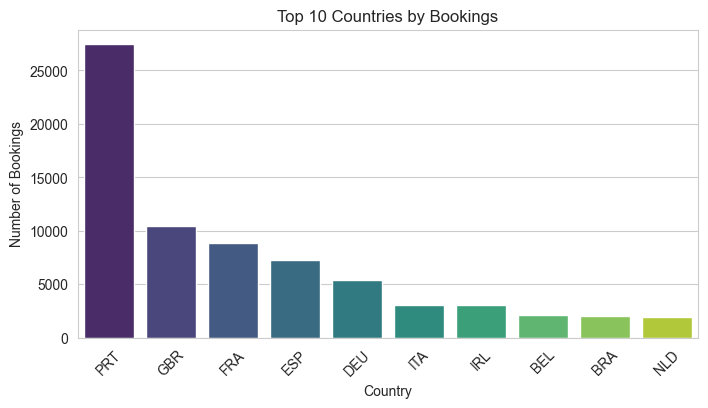

C:\Users\light\AppData\Local\Temp\ipykernel_14260\2360753622.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=guest_composition.index, y=guest_composition.values, palette="coolwarm")


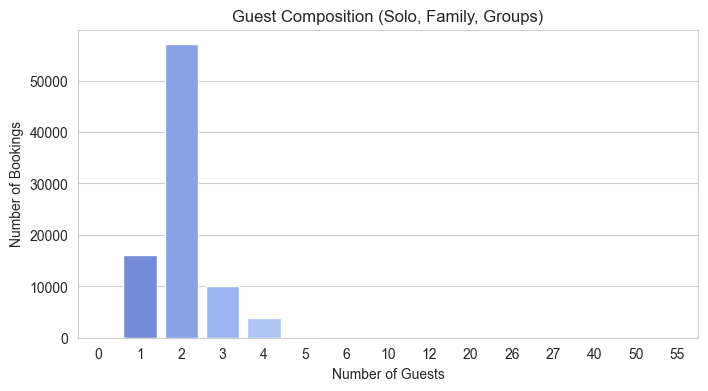

In [19]:
# Analyzing Top Countries for Bookings
top_countries = df['country'].value_counts().head(10)

# Plotting Top Countries
plt.figure(figsize=(8, 4))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.title("Top 10 Countries by Bookings")
plt.xticks(rotation=45)
plt.show()

# Guest Composition (Solo, Family, Group)
df['total_guests'] = df['adults'] + df['children'] + df['babies']
guest_composition = df['total_guests'].value_counts().sort_index()

# Plotting Guest Composition
plt.figure(figsize=(8, 4))
sns.barplot(x=guest_composition.index, y=guest_composition.values, palette="coolwarm")
plt.xlabel("Number of Guests")
plt.ylabel("Number of Bookings")
plt.title("Guest Composition (Solo, Family, Groups)")
plt.show()

CUSTOMER DEMOGRAPHICS , ROOM & STAY PREFENCES AND BOOKING BEHAVIOURS

C:\Users\light\AppData\Local\Temp\ipykernel_14260\299736271.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_types.index, y=room_types.values, palette="muted")


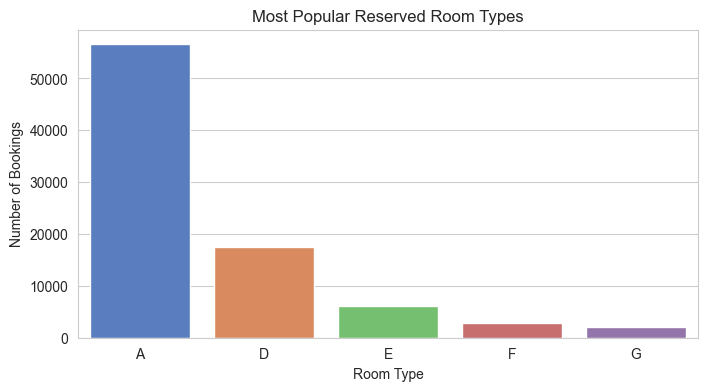

C:\Users\light\AppData\Local\Temp\ipykernel_14260\299736271.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stay_distribution.index[:10], y=stay_distribution.values[:10], palette="coolwarm")


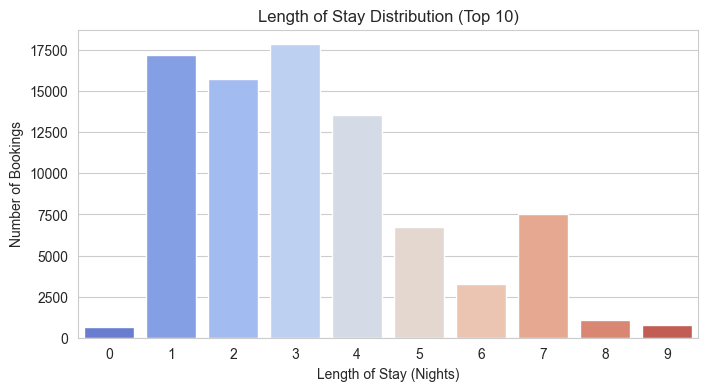

In [20]:
# Analyzing Most Popular Room Types
room_types = df['reserved_room_type'].value_counts().head(5)

# Plotting Room Preferences
plt.figure(figsize=(8, 4))
sns.barplot(x=room_types.index, y=room_types.values, palette="muted")
plt.xlabel("Room Type")
plt.ylabel("Number of Bookings")
plt.title("Most Popular Reserved Room Types")
plt.show()

# Analyzing Length of Stay
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
stay_distribution = df['total_nights'].value_counts().sort_index()

# Plotting Length of Stay
plt.figure(figsize=(8, 4))
sns.barplot(x=stay_distribution.index[:10], y=stay_distribution.values[:10], palette="coolwarm")
plt.xlabel("Length of Stay (Nights)")
plt.ylabel("Number of Bookings")
plt.title("Length of Stay Distribution (Top 10)")
plt.show()

*   **Customer Demographics**:
Top Booking Countries: Portugal, UK, France, and Spain dominate bookings.

*   **Guest Composition**:

Solo travelers (1 guest) are common.

Most bookings are for 2-person stays (likely couples or business travelers).

Families and larger groups are less frequent.

C:\Users\light\AppData\Local\Temp\ipykernel_14260\570621590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_segments.index, y=market_segments.values, palette="pastel")


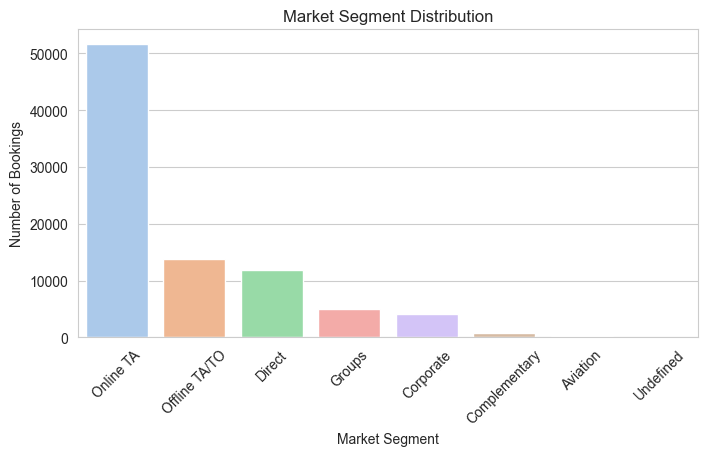

C:\Users\light\AppData\Local\Temp\ipykernel_14260\570621590.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=special_requests.index, y=special_requests.values, palette="coolwarm")


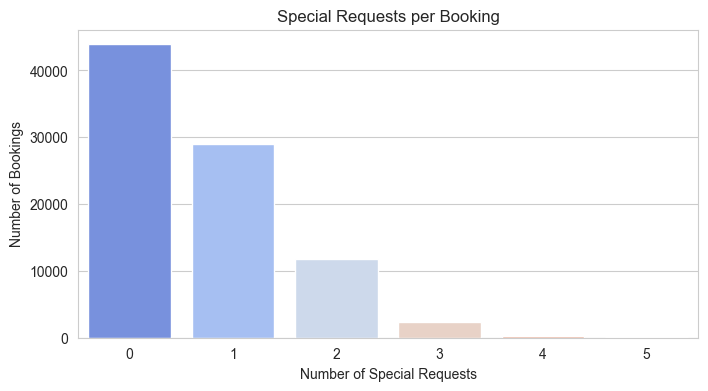

C:\Users\light\AppData\Local\Temp\ipykernel_14260\570621590.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parking_demand.index, y=parking_demand.values, palette="viridis")


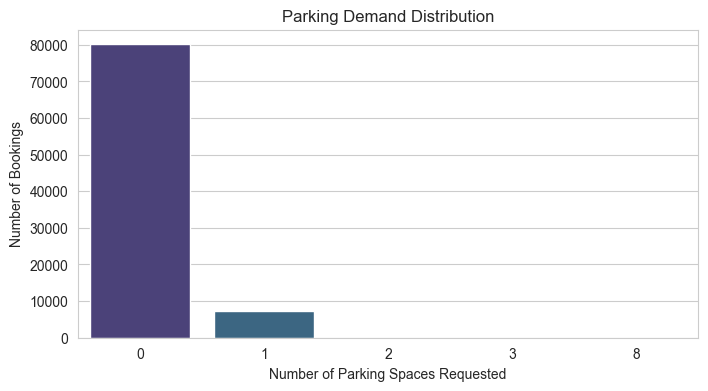

In [21]:
# Analyzing Market Segments
market_segments = df['market_segment'].value_counts()

# Plotting Market Segment Distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=market_segments.index, y=market_segments.values, palette="pastel")
plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.title("Market Segment Distribution")
plt.xticks(rotation=45)
plt.show()

# Special Requests Analysis
special_requests = df['total_of_special_requests'].value_counts().sort_index()

# Plotting Special Requests Distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=special_requests.index, y=special_requests.values, palette="coolwarm")
plt.xlabel("Number of Special Requests")
plt.ylabel("Number of Bookings")
plt.title("Special Requests per Booking")
plt.show()

# Parking Demand Analysis
parking_demand = df['required_car_parking_spaces'].value_counts().sort_index()

# Plotting Parking Demand
plt.figure(figsize=(8, 4))
sns.barplot(x=parking_demand.index, y=parking_demand.values, palette="viridis")
plt.xlabel("Number of Parking Spaces Requested")
plt.ylabel("Number of Bookings")
plt.title("Parking Demand Distribution")
plt.show()

Room & Stay Preferences:
    Most Popular Room Type: Room A is the most frequently booked.

Average Stay Duration:
    1-3 nights is the most common stay length.
    Stays longer than 7 nights are rare.

Hotel Booking Analysis - Final Report Summary

1. Booking & Cancellation Trends
    27.49% of bookings were canceled.
    Cancellations are high for bookings with long lead times (made months in advance).
    No-deposit bookings have the highest cancellation rates.

2. Seasonal Trends & Revenue Insights
    Peak Season: July & August have the highest bookings and ADR (~$145).
    Off-Peak Season: November & December have the lowest bookings and ADR (~$75).
    Hotels should adjust pricing & cancellation policies based on seasonality.

3. Customer Demographics
    Top Booking Countries: Portugal, UK, France, Spain.
    Most guests are couples (2-person bookings); solo travelers are also common.

4. Room & Stay Preferences
    Room A is the most booked.
    Most stays last 1-3 nights. Stays longer than 7 nights are rare.
    Hotels can offer bundle deals to encourage longer stays.

5. Booking Behavior
    Online Travel Agents (OTA) dominate bookings (direct/corporate bookings are lower).
    Special Requests: Most guests make 0-2 requests; a few request 5+.
    Parking Demand is low—most guests do not request parking.

KEY TRENDS AND SUGGESTED STRATEGIES TO IMPROVE BOOKING RATES:-

1.Reduce cancellations by requiring deposits for long-lead-time bookings.
2.Adjust pricing based on seasonality to maximize revenue.
3.Encourage direct bookings with loyalty programs.
4.Optimize room offerings for short stays and couples.
5.Improve customer experience by managing special requests effectively.